# **Language as Grammar: Parsing English/Code as a Basis for Language Generation**

Here we explore how the parsing exercises we did with SpaCy can be used to generate language. What advantages does this approach offer over the use of n-grams for generation? Where and when does it break down? Why? Is parsing a formal language (seen at the end of this notebook) similar to parsing a natural language? Why or why not?

In [ ]:
import nltk

In [ ]:
sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']

parser = nltk.ChartParser(groucho_grammar)
for tree in parser.parse(sent):
  print(tree)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


In [ ]:
groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

# **CFG: Grammar Generation**

* https://www.nltk.org/book/ch08.html

In [ ]:
from nltk.parse.generate import generate, demo_grammar
from nltk import CFG

grammar = CFG.fromstring(demo_grammar)
print(grammar)

Grammar with 13 productions (start state = S)
    S -> NP VP
    NP -> Det N
    PP -> P NP
    VP -> 'slept'
    VP -> 'saw' NP
    VP -> 'walked' PP
    Det -> 'the'
    Det -> 'a'
    N -> 'man'
    N -> 'park'
    N -> 'dog'
    P -> 'in'
    P -> 'with'


In [ ]:
for sentence in generate(grammar, n=5):
  print(' '.join(sentence))

the man slept
the man saw the man
the man saw the park
the man saw the dog
the man saw a man


In [ ]:
for sentence in generate(grammar, depth=10):
  print(' '.join(sentence))

the man slept
the man saw the man
the man saw the park
the man saw the dog
the man saw a man
the man saw a park
the man saw a dog
the man walked in the man
the man walked in the park
the man walked in the dog
the man walked in a man
the man walked in a park
the man walked in a dog
the man walked with the man
the man walked with the park
the man walked with the dog
the man walked with a man
the man walked with a park
the man walked with a dog
the park slept
the park saw the man
the park saw the park
the park saw the dog
the park saw a man
the park saw a park
the park saw a dog
the park walked in the man
the park walked in the park
the park walked in the dog
the park walked in a man
the park walked in a park
the park walked in a dog
the park walked with the man
the park walked with the park
the park walked with the dog
the park walked with a man
the park walked with a park
the park walked with a dog
the dog slept
the dog saw the man
the dog saw the park
the dog saw the dog
the dog saw a 

# **Python AST**

* https://github.com/hchasestevens/show_ast

In [ ]:
!pip install showast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 15.3 MB/s 
  Created wheel for showast: filename=showast-0.2.4-py3-none-any.whl size=6044 sha256=6635b20cc056c15c93618885421b9ee543e8849b29c2a168c812b2f719bf1a83
  Stored in directory: /root/.cache/pip/wheels/7a/99/9c/efb972a66dba1881f91b23fa1f2c88f8c38058f551b33e2dcc
Successfully built showast


In [ ]:
import showast

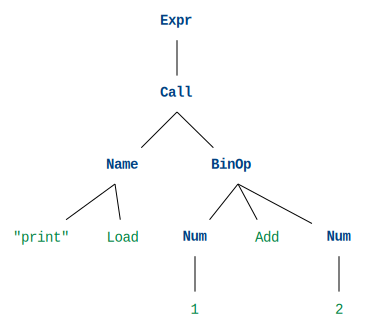

In [ ]:
%%showast

print(1 + 2)

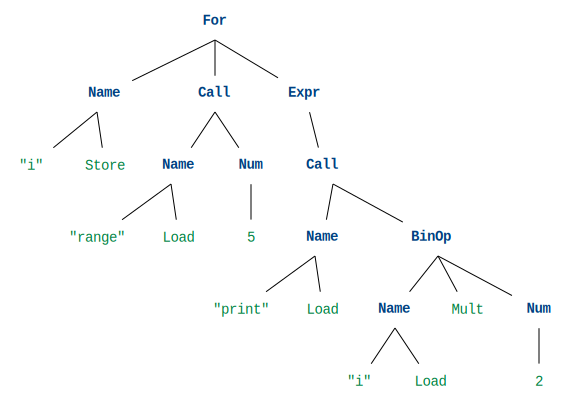

In [ ]:
%%showast

for i in range(5):
  print(i * 2)


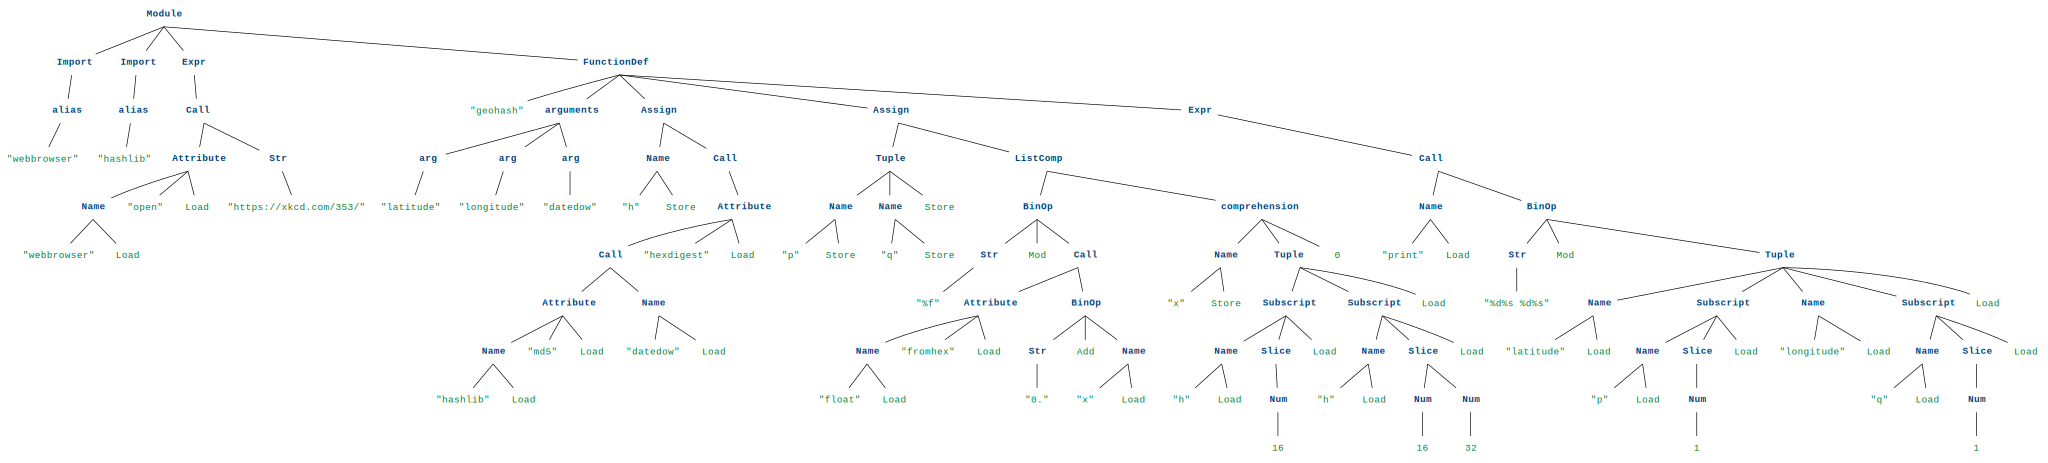

In [ ]:
from showast import show_source

import antigravity

show_source(antigravity)